In [1]:
import numpy as np
import mne
# PYHRV IMPORTS
import biosppy
import pyhrv
import pyhrv.time_domain as td
import pyhrv.tools as tools
#from pecg import Preprocessing as Pre
# MATH
import math

# SKLEARN
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, zero_one_loss
from sklearn.neural_network import MLPClassifier

# PANDAS
import pandas as pd

# Taking data out of files #

In [38]:
file_1M1 = "ECG_data/01M_1_edited.edf"
data_1M1 = mne.io.read_raw_edf(file_1M1)
raw_data_1M1 = data_1M1.get_data()
# you can get the metadata included in the file and a list of all channels:
info_1M1 = data_1M1.info
channels_1M1 = data_1M1.ch_names
events_1M1 = mne.events_from_annotations(data_1M1)[0]
print(info_1M1)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\01M_1_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:47:31 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [39]:
file_1M2 = "ECG_data/01M_2_edited.edf"
data_1M2 = mne.io.read_raw_edf(file_1M2)
raw_data_1M2 = data_1M2.get_data()
# you can get the metadata included in the file and a list of all channels:
info_1M2 = data_1M2.info
channels_1M2 = data_1M2.ch_names
events_1M2 = mne.events_from_annotations(data_1M2)[0]
print(info_1M2)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\01M_2_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:52:38 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [40]:
file_2F1 = "ECG_data/02F_1_edited.edf"
data_2F1 = mne.io.read_raw_edf(file_2F1)
raw_data_2F1 = data_2F1.get_data()
# you can get the metadata included in the file and a list of all channels:
info_2F1 = data_2F1.info
channels_2F1 = data_2F1.ch_names
events_2F1 = mne.events_from_annotations(data_2F1)[0]
print(info_2F1)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\02F_1_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:44:00 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [41]:
file_2F2 = "ECG_data/02F_2_edited.edf"
data_2F2 = mne.io.read_raw_edf(file_2F2)
raw_data_2F2 = data_2F2.get_data()
# you can get the metadata included in the file and a list of all channels:
info_2F2 = data_2F2.info
channels_2F2 = data_2F2.ch_names
events_2F2 = mne.events_from_annotations(data_2F2)[0]
print(info_2F2)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\02F_2_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:55:58 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [42]:
file_3F1 = "ECG_data/03F_1_edited.edf"
data_3F1 = mne.io.read_raw_edf(file_3F1)
raw_data_3F1 = data_3F1.get_data()
# you can get the metadata included in the file and a list of all channels:
info_3F1 = data_3F1.info
channels_3F1 = data_3F1.ch_names
events_3F1 = mne.events_from_annotations(data_3F1)[0]
print(info_3F1)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\03F_1_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 15:12:18 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [43]:
file_3F2 = "ECG_data/03F_2_edited.edf"
data_3F2 = mne.io.read_raw_edf(file_3F2)
raw_data_3F2 = data_3F2.get_data()
# you can get the metadata included in the file and a list of all channels:
info_3F2 = data_3F2.info
channels_3F2 = data_3F2.ch_names
events_3F2 = mne.events_from_annotations(data_3F2)[0]
print(info_3F2)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\03F_2_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:43:22 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [44]:
file_4M1 = "ECG_data/04M_1_edited.edf"
data_4M1 = mne.io.read_raw_edf(file_4M1)
raw_data_4M1 = data_4M1.get_data()
# you can get the metadata included in the file and a list of all channels:
info_4M1 = data_4M1.info
channels_4M1 = data_4M1.ch_names
events_4M1 = mne.events_from_annotations(data_4M1)[0]
print(info_4M1)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\04M_1_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:58:50 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [45]:
file_4M2 = "ECG_data/04M_2_edited.edf"
data_4M2 = mne.io.read_raw_edf(file_4M2)
raw_data_4M2 = data_4M2.get_data()
# you can get the metadata included in the file and a list of all channels:
info_4M2 = data_4M2.info
channels_4M2 = data_4M2.ch_names
events_4M2 = mne.events_from_annotations(data_4M2)[0]
print(info_4M2)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\04M_2_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:38:05 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [46]:
file_5M1 = "ECG_data/05M_1_edited.edf"
data_5M1 = mne.io.read_raw_edf(file_5M1)
raw_data_5M1 = data_5M1.get_data()
# you can get the metadata included in the file and a list of all channels:
info_5M1 = data_5M1.info
channels_5M1 = data_5M1.ch_names
events_5M1 = mne.events_from_annotations(data_5M1)[0]
print(info_5M1)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\05M_1_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:38:38 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [47]:
file_5M2 = "ECG_data/05M_2_edited.edf"
data_5M2 = mne.io.read_raw_edf(file_5M2)
raw_data_5M2 = data_5M2.get_data()
# you can get the metadata included in the file and a list of all channels:
info_5M2 = data_5M2.info
channels_5M2 = data_5M2.ch_names
events_5M2 = mne.events_from_annotations(data_5M2)[0]
print(info_5M2)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\05M_2_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:59:56 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [48]:
file_6M1 = "ECG_data/06M_1_edited.edf"
data_6M1 = mne.io.read_raw_edf(file_6M1)
raw_data_6M1 = data_6M1.get_data()
# you can get the metadata included in the file and a list of all channels:
info_6M1 = data_6M1.info
channels_6M1 = data_6M1.ch_names
events_6M1 = mne.events_from_annotations(data_6M1)[0]
print(info_6M1)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\06M_1_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:43:31 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [49]:
file_6M2 = "ECG_data/06M_2_edited.edf"
data_6M2 = mne.io.read_raw_edf(file_6M2)
raw_data_6M2 = data_6M2.get_data()
# you can get the metadata included in the file and a list of all channels:
info_6M2 = data_6M2.info
channels_6M2 = data_6M2.ch_names
events_6M2 = mne.events_from_annotations(data_6M2)[0]
print(info_6M2)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\06M_2_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 15:17:25 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [50]:
file_7F1 = "ECG_data/07F_1_edited.edf"
data_7F1 = mne.io.read_raw_edf(file_7F1)
raw_data_7F1 = data_7F1.get_data()
# you can get the metadata included in the file and a list of all channels:
info_7F1 = data_7F1.info
channels_7F1 = data_7F1.ch_names
events_7F1 = mne.events_from_annotations(data_7F1)[0]
print(info_7F1)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\07F_1_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:57:50 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [51]:
file_7F2 = "ECG_data/07F_2_edited.edf"
data_7F2 = mne.io.read_raw_edf(file_7F2)
raw_data_7F2 = data_7F2.get_data()
# you can get the metadata included in the file and a list of all channels:
info_7F2 = data_7F2.info
channels_7F2 = data_7F2.ch_names
events_7F2 = mne.events_from_annotations(data_7F2)[0]
print(info_7F2)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\07F_2_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:55:48 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [52]:
file_8M1 = "ECG_data/08M_1_edited.edf"
data_8M1 = mne.io.read_raw_edf(file_8M1)
raw_data_8M1 = data_8M1.get_data()
# you can get the metadata included in the file and a list of all channels:
info_8M1 = data_8M1.info
channels_8M1 = data_8M1.ch_names
events_8M1 = mne.events_from_annotations(data_8M1)[0]
print(info_8M1)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\08M_1_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:55:07 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [53]:
file_8M2 = "ECG_data/08M_2_edited.edf"
data_8M2 = mne.io.read_raw_edf(file_8M2)
raw_data_8M2 = data_8M2.get_data()
# you can get the metadata included in the file and a list of all channels:
info_8M2 = data_8M2.info
channels_8M2 = data_8M2.ch_names
events_8M2 = mne.events_from_annotations(data_8M2)[0]
print(info_8M2)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\08M_2_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:54:36 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [54]:
file_9M1 = "ECG_data/09M_1_edited.edf"
data_9M1 = mne.io.read_raw_edf(file_9M1)
raw_data_9M1 = data_9M1.get_data()
# you can get the metadata included in the file and a list of all channels:
info_9M1 = data_9M1.info
channels_9M1 = data_9M1.ch_names
events_9M1 = mne.events_from_annotations(data_9M1)[0]
print(info_9M1)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\09M_1_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:46:02 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [55]:
file_9M2 = "ECG_data/09M_2_edited.edf"
data_9M2 = mne.io.read_raw_edf(file_9M2)
raw_data_9M2 = data_9M2.get_data()
# you can get the metadata included in the file and a list of all channels:
info_9M2 = data_9M2.info
channels_9M2 = data_9M2.ch_names
events_9M2 = mne.events_from_annotations(data_9M2)[0]
print(info_9M2)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\09M_2_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:52:30 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [56]:
file_10M1 = "ECG_data/10M_1_edited.edf"
data_10M1 = mne.io.read_raw_edf(file_10M1)
raw_data_10M1 = data_10M1.get_data()
# you can get the metadata included in the file and a list of all channels:
info_10M1 = data_10M1.info
channels_10M1 = data_10M1.ch_names
events_10M1 = mne.events_from_annotations(data_10M1)[0]
print(info_10M1)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\10M_1_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 15:06:40 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [57]:
file_10M2 = "ECG_data/10M_2_edited.edf"
data_10M2 = mne.io.read_raw_edf(file_10M2)
raw_data_10M2 = data_10M2.get_data()
# you can get the metadata included in the file and a list of all channels:
info_10M2 = data_10M2.info
channels_10M2 = data_10M2.ch_names
events_10M2 = mne.events_from_annotations(data_10M2)[0]
print(info_10M2)

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\10M_2_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Event']
<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 15:50:21 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


# Get Raw ECG Signal #

In [91]:
print(len(events_1M1))
raw_ecg_1M1 = raw_data_1M1[6]
print(len(raw_ecg_1M1))

26
935040


In [92]:
print(len(events_1M2))
raw_ecg_1M2 = raw_data_1M2[6]
print(len(raw_ecg_1M2))

58
931200


In [93]:
print(len(events_2F1))
raw_ecg_2F1 = raw_data_2F1[6]
print(len(raw_ecg_2F1))

37
944640


In [94]:
print(len(events_2F2))
raw_ecg_2F2 = raw_data_2F2[6]
print(len(raw_ecg_2F2))

29
929280


In [95]:
print(len(events_3F1))
raw_ecg_3F1 = raw_data_3F1[6]
print(len(raw_ecg_3F1))

86
935040


In [90]:
print(len(events_3F2))
raw_ecg_3F2 = raw_data_3F2[6]
print(len(raw_ecg_3F2))

96
940800


In [89]:
print(len(events_4M1))
raw_ecg_4M1 = raw_data_4M1[6]
print(len(raw_ecg_4M1))

36
887040


In [88]:
print(len(events_4M2))
raw_ecg_4M2 = raw_data_4M2[6]
print(len(raw_ecg_4M2))

46
923520


In [87]:
print(len(events_5M1))
raw_ecg_5M1 = raw_data_5M1[6]
print(len(raw_ecg_5M1))

25
927360


In [70]:
print(len(events_5M2))
raw_ecg_5M2 = raw_data_5M2[6]
print(len(raw_ecg_5M2))

39
927360


In [71]:
print(len(events_6M1))
raw_ecg_6M1 = raw_data_6M1[6]
print(len(raw_ecg_6M1))

36
923520


In [72]:
print(len(events_6M2))
raw_ecg_6M2 = raw_data_6M2[6]
print(len(raw_ecg_6M2))

19
938880


In [73]:
print(len(events_7F1))
raw_ecg_7F1 = raw_data_7F1[6]
print(len(raw_ecg_7F1))

90
933120


In [74]:
print(len(events_7F2))
raw_ecg_7F2 = raw_data_7F2[6]
print(len(raw_ecg_7F2))

162
931200


In [75]:
print(len(events_8M1))
raw_ecg_8M1 = raw_data_8M1[6]
print(len(raw_ecg_8M1))

5
925440


In [76]:
print(len(events_8M2))
raw_ecg_8M2 = raw_data_8M2[6]
print(len(raw_ecg_8M2))

8
925440


In [77]:
print(len(events_9M1))
raw_ecg_9M1 = raw_data_9M1[6]
print(len(raw_ecg_9M1))

2
925440


In [78]:
print(len(events_9M2))
raw_ecg_9M2 = raw_data_9M2[6]
print(len(raw_ecg_9M2))

5
927360


In [79]:
print(len(events_10M1))
raw_ecg_10M1 = raw_data_10M1[6]
print(len(raw_ecg_10M1))

3
925440


In [80]:
print(len(events_10M2))
raw_ecg_10M2 = raw_data_10M2[6]
print(len(raw_ecg_10M2))

8
927360


# Get Event Series #

In [216]:
print(len(raw_ecg_1M1))
all_event_series = []
print(events_1M1)
all_event_series = []
all_event_series.append(raw_ecg_1M1[7*128:896+120*128])
for event in events_1M1[1:-2]:
    all_event_series.append(raw_ecg_1M1[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_1M1[len(raw_ecg_1M1)-(120*128):])
print(len(all_event_series))

935040
[[  1024      0      1]
 [193280      0      1]
 [274304      0      1]
 [285312      0      1]
 [300032      0      1]
 [316288      0      1]
 [324480      0      1]
 [343808      0      1]
 [384256      0      1]
 [399488      0      1]
 [410880      0      1]
 [429440      0      1]
 [504832      0      1]
 [524928      0      1]
 [532608      0      1]
 [559488      0      1]
 [577536      0      1]
 [589568      0      1]
 [604800      0      1]
 [625664      0      1]
 [633088      0      1]
 [651776      0      1]
 [873856      0      1]
 [887936      0      1]
 [932352      0      1]
 [933632      0      1]]
25


In [217]:
print(len(raw_ecg_1M2))
print(events_1M2)
all_event_series.append(raw_ecg_1M2[9*128:9*128+120*128])
for event in events_1M2[1:-3]:
    all_event_series.append(raw_ecg_1M2[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_1M2[len(raw_ecg_1M2)-(120*128):])
print(len(all_event_series))

931200
[[  1664      0      1]
 [ 71168      0      1]
 [ 92032      0      1]
 [100736      0      1]
 [106624      0      1]
 [115200      0      1]
 [136448      0      1]
 [149632      0      1]
 [156160      0      1]
 [159744      0      1]
 [167168      0      1]
 [174720      0      1]
 [176896      0      1]
 [182272      0      1]
 [190336      0      1]
 [193152      0      1]
 [198784      0      1]
 [208384      0      1]
 [216320      0      1]
 [223872      0      1]
 [231808      0      1]
 [234368      0      1]
 [241536      0      1]
 [247040      0      1]
 [269696      0      1]
 [316160      0      1]
 [332928      0      1]
 [350208      0      1]
 [391808      0      1]
 [406400      0      1]
 [417920      0      1]
 [439424      0      1]
 [460288      0      1]
 [467840      0      1]
 [474496      0      1]
 [502400      0      1]
 [506752      0      1]
 [511232      0      1]
 [514176      0      1]
 [525056      0      1]
 [548224      0      1]
 [561152 

In [218]:
print(len(raw_ecg_2F1))
print(events_2F1)
all_event_series.append(raw_ecg_2F1[8*128:8*128+120*128])
for event in events_2F1[1:-2]:
    all_event_series.append(raw_ecg_2F1[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_2F1[len(raw_ecg_2F1)-(120*128):])
print(len(all_event_series))

944640
[[  1024      0      1]
 [ 28928      0      1]
 [ 48384      0      1]
 [ 49408      0      1]
 [ 79104      0      1]
 [175872      0      1]
 [196480      0      1]
 [201856      0      1]
 [282496      0      1]
 [321152      0      1]
 [344832      0      1]
 [371200      0      1]
 [388096      0      1]
 [414592      0      1]
 [584320      0      1]
 [596992      0      1]
 [598016      0      1]
 [618368      0      1]
 [639872      0      1]
 [646272      0      1]
 [649344      0      1]
 [654976      0      1]
 [668032      0      1]
 [676352      0      1]
 [678144      0      1]
 [694656      0      1]
 [701184      0      1]
 [705536      0      1]
 [707072      0      1]
 [709504      0      1]
 [725376      0      1]
 [725632      0      1]
 [747904      0      1]
 [809216      0      1]
 [817920      0      1]
 [942080      0      1]
 [942336      0      1]]
117


In [219]:
print(len(raw_ecg_2F2))
print(events_2F2)
print(len(events_2F2))
all_event_series.append(raw_ecg_2F2[3*128:3*128+120*128])
print(events_2F2[0])
for event in events_2F2[1:]:
    all_event_series.append(raw_ecg_2F2[event[0]-(60*128):event[0]+(60*128)])
print(len(all_event_series))

929280
[[   896      0      1]
 [ 61696      0      1]
 [ 80000      0      1]
 [188928      0      1]
 [409984      0      1]
 [416896      0      1]
 [435584      0      1]
 [448256      0      1]
 [463872      0      1]
 [469248      0      1]
 [476544      0      1]
 [484608      0      1]
 [548736      0      1]
 [557184      0      1]
 [559744      0      1]
 [571904      0      1]
 [573184      0      1]
 [590336      0      1]
 [622208      0      1]
 [711936      0      1]
 [723072      0      1]
 [725248      0      1]
 [737280      0      1]
 [739328      0      1]
 [741632      0      1]
 [754432      0      1]
 [816000      0      1]
 [832640      0      1]
 [854400      0      1]]
29
[896   0   1]
146


In [220]:
print(len(raw_ecg_3F1))
print(events_3F1)
print(len(events_3F1))
all_event_series.append(raw_ecg_3F1[0:120*128])
for event in events_3F1[1:-1]:
    all_event_series.append(raw_ecg_3F1[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_3F1[len(raw_ecg_3F1)-(120*128):])
print(len(all_event_series))

935040
[[   384      0      1]
 [101760      0      1]
 [204672      0      1]
 [216832      0      1]
 [220928      0      1]
 [229504      0      1]
 [252672      0      1]
 [256512      0      1]
 [262912      0      1]
 [270336      0      1]
 [274176      0      1]
 [283648      0      1]
 [292608      0      1]
 [299648      0      1]
 [311808      0      1]
 [317440      0      1]
 [328960      0      1]
 [333824      0      1]
 [356096      0      1]
 [363136      0      1]
 [371456      0      1]
 [403968      0      1]
 [411136      0      1]
 [425728      0      1]
 [433280      0      1]
 [441728      0      1]
 [455040      0      1]
 [461440      0      1]
 [464512      0      1]
 [466688      0      1]
 [473472      0      1]
 [481920      0      1]
 [489216      0      1]
 [491904      0      1]
 [497664      0      1]
 [502400      0      1]
 [505472      0      1]
 [513408      0      1]
 [517888      0      1]
 [520576      0      1]
 [536960      0      1]
 [541952 

In [221]:
print(len(raw_ecg_3F2))
print(events_3F2)
print(len(events_3F2))
all_event_series.append(raw_ecg_3F2[6*128:6*128+120*128])
for event in events_3F2[1:-2]:
    all_event_series.append(raw_ecg_3F2[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_3F2[len(raw_ecg_3F2)-(120*128):])
print(len(all_event_series))

940800
[[   896      0      1]
 [ 83456      0      1]
 [ 88448      0      1]
 [ 94720      0      1]
 [ 98560      0      1]
 [106624      0      1]
 [132480      0      1]
 [141952      0      1]
 [144768      0      1]
 [151552      0      1]
 [153088      0      1]
 [156160      0      1]
 [158336      0      1]
 [159616      0      1]
 [165120      0      1]
 [166784      0      1]
 [170880      0      1]
 [176384      0      1]
 [178432      0      1]
 [183552      0      1]
 [186112      0      1]
 [188928      0      1]
 [190464      0      1]
 [194176      0      1]
 [196096      0      1]
 [198400      0      1]
 [201472      0      1]
 [204672      0      1]
 [206720      0      1]
 [208512      0      1]
 [210816      0      1]
 [214400      0      1]
 [216448      0      1]
 [218752      0      1]
 [220800      0      1]
 [222976      0      1]
 [225920      0      1]
 [227328      0      1]
 [229120      0      1]
 [231552      0      1]
 [232320      0      1]
 [235520 

In [222]:
print(len(raw_ecg_4M1))
print(events_4M1)
print(len(events_4M1))
all_event_series.append(raw_ecg_4M1[8*128:8*128+120*128])
for event in events_4M1[1:]:
    all_event_series.append(raw_ecg_4M1[event[0]-(60*128):event[0]+(60*128)])
print(len(all_event_series))

887040
[[  1024      0      1]
 [ 50304      0      1]
 [ 73472      0      1]
 [ 79488      0      1]
 [ 88960      0      1]
 [111616      0      1]
 [121088      0      1]
 [131456      0      1]
 [141312      0      1]
 [149120      0      1]
 [153344      0      1]
 [179968      0      1]
 [194176      0      1]
 [201216      0      1]
 [239616      0      1]
 [248576      0      1]
 [288640      0      1]
 [326144      0      1]
 [351872      0      1]
 [379776      0      1]
 [389376      0      1]
 [401536      0      1]
 [425344      0      1]
 [435072      0      1]
 [509056      0      1]
 [519040      0      1]
 [557952      0      1]
 [560640      0      1]
 [573312      0      1]
 [607104      0      1]
 [625280      0      1]
 [632576      0      1]
 [643200      0      1]
 [649984      0      1]
 [721024      0      1]
 [738048      0      1]]
36
363


In [223]:
print(len(raw_ecg_4M2))
print(events_4M2)
print(len(events_4M2))
all_event_series.append(raw_ecg_4M2[12*128:12*128+120*128])
for event in events_4M2[1:-1]:
    all_event_series.append(raw_ecg_4M2[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_4M2[len(raw_ecg_4M2)-(120*128):])
print(len(all_event_series))

923520
[[  1792      0      1]
 [ 13568      0      1]
 [ 82688      0      1]
 [ 97792      0      1]
 [113536      0      1]
 [118144      0      1]
 [135168      0      1]
 [186240      0      1]
 [204672      0      1]
 [241152      0      1]
 [275968      0      1]
 [307200      0      1]
 [313600      0      1]
 [325760      0      1]
 [331264      0      1]
 [337408      0      1]
 [342272      0      1]
 [350592      0      1]
 [358400      0      1]
 [374912      0      1]
 [385152      0      1]
 [389632      0      1]
 [407040      0      1]
 [439424      0      1]
 [441472      0      1]
 [449664      0      1]
 [478080      0      1]
 [483456      0      1]
 [497536      0      1]
 [503168      0      1]
 [517248      0      1]
 [526336      0      1]
 [571392      0      1]
 [587776      0      1]
 [590080      0      1]
 [606464      0      1]
 [614656      0      1]
 [630784      0      1]
 [648192      0      1]
 [680448      0      1]
 [721152      0      1]
 [736128 

In [224]:
print(len(raw_ecg_5M1))
print(events_5M1)
print(len(events_5M1))
all_event_series.append(raw_ecg_5M1[8*128:8*128+120*128])
for event in events_5M1[1:-1]:
    all_event_series.append(raw_ecg_5M1[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_5M1[len(raw_ecg_5M1)-(120*128):])
print(len(all_event_series))

927360
[[  1024      0      1]
 [141440      0      1]
 [156800      0      1]
 [163072      0      1]
 [180864      0      1]
 [193536      0      1]
 [222976      0      1]
 [275968      0      1]
 [303872      0      1]
 [321920      0      1]
 [339968      0      1]
 [356864      0      1]
 [365312      0      1]
 [380544      0      1]
 [389120      0      1]
 [403840      0      1]
 [414720      0      1]
 [454144      0      1]
 [508032      0      1]
 [520832      0      1]
 [626688      0      1]
 [626816      0      1]
 [688512      0      1]
 [715264      0      1]
 [922496      0      1]]
25
434


In [225]:
print(len(raw_ecg_5M2))
print(events_5M2)
print(len(events_5M2))
all_event_series.append(raw_ecg_5M2[12*128:12*128+120*128])
for event in events_5M2[1:-1]:
    all_event_series.append(raw_ecg_5M2[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_5M2[len(raw_ecg_5M2)-(120*128):])
print(len(all_event_series))

927360
[[  1536      0      1]
 [134144      0      1]
 [197888      0      1]
 [209536      0      1]
 [229888      0      1]
 [236416      0      1]
 [265856      0      1]
 [275712      0      1]
 [285184      0      1]
 [288000      0      1]
 [301952      0      1]
 [309120      0      1]
 [313600      0      1]
 [317056      0      1]
 [335872      0      1]
 [347136      0      1]
 [374272      0      1]
 [394880      0      1]
 [401280      0      1]
 [425728      0      1]
 [432256      0      1]
 [436224      0      1]
 [441472      0      1]
 [464384      0      1]
 [464512      0      1]
 [490496      0      1]
 [497024      0      1]
 [498816      0      1]
 [502784      0      1]
 [524416      0      1]
 [530816      0      1]
 [547328      0      1]
 [552192      0      1]
 [559744      0      1]
 [563840      0      1]
 [572672      0      1]
 [580224      0      1]
 [853760      0      1]
 [924672      0      1]]
39
473


In [226]:
print(len(raw_ecg_6M1))
print(events_6M1)
print(len(events_6M1))
all_event_series.append(raw_ecg_6M1[14*128:14*128+120*128])
for event in events_6M1[1:-1]:
    all_event_series.append(raw_ecg_6M1[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_6M1[len(raw_ecg_6M1)-(120*128):])
print(len(all_event_series))

923520
[[  1792      0      1]
 [ 99072      0      1]
 [116736      0      1]
 [193664      0      1]
 [217728      0      1]
 [225536      0      1]
 [242688      0      1]
 [319104      0      1]
 [335616      0      1]
 [355328      0      1]
 [380160      0      1]
 [395904      0      1]
 [410624      0      1]
 [414848      0      1]
 [417536      0      1]
 [417792      0      1]
 [424832      0      1]
 [444160      0      1]
 [448512      0      1]
 [455168      0      1]
 [491136      0      1]
 [493312      0      1]
 [539648      0      1]
 [543744      0      1]
 [545920      0      1]
 [549120      0      1]
 [551936      0      1]
 [555136      0      1]
 [564992      0      1]
 [652416      0      1]
 [670848      0      1]
 [684160      0      1]
 [684288      0      1]
 [690176      0      1]
 [902656      0      1]
 [922240      0      1]]
36
509


In [227]:
print(len(raw_ecg_6M2))
print(events_6M2)
print(len(events_6M2))
all_event_series.append(raw_ecg_6M2[0:120*128])
for event in events_6M2[1:]:
    all_event_series.append(raw_ecg_6M2[event[0]-(60*128):event[0]+(60*128)])
print(len(all_event_series))

938880
[[   768      0      1]
 [ 58496      0      1]
 [220288      0      1]
 [238080      0      1]
 [360704      0      1]
 [367744      0      1]
 [372096      0      1]
 [375168      0      1]
 [378752      0      1]
 [437504      0      1]
 [457216      0      1]
 [472064      0      1]
 [514944      0      1]
 [602624      0      1]
 [651648      0      1]
 [849408      0      1]
 [894464      0      1]
 [929024      0      1]
 [929152      0      1]]
19
528


In [228]:
print(len(raw_ecg_7F1))
print(events_7F1)
print(len(events_7F1))
all_event_series.append(raw_ecg_7F1[0:120*128])
for event in events_7F1[1:-1]:
    all_event_series.append(raw_ecg_7F1[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_7F1[len(raw_ecg_7F1)-(120*128):])
print(len(all_event_series))

933120
[[   384      0      1]
 [ 99968      0      1]
 [105728      0      1]
 [121472      0      1]
 [162816      0      1]
 [165504      0      1]
 [180736      0      1]
 [194048      0      1]
 [200192      0      1]
 [203392      0      1]
 [227712      0      1]
 [241664      0      1]
 [279040      0      1]
 [293248      0      1]
 [300544      0      1]
 [304640      0      1]
 [307968      0      1]
 [310912      0      1]
 [316416      0      1]
 [322816      0      1]
 [325632      0      1]
 [329856      0      1]
 [333056      0      1]
 [341120      0      1]
 [369664      0      1]
 [376448      0      1]
 [390528      0      1]
 [393088      0      1]
 [402560      0      1]
 [410880      0      1]
 [414464      0      1]
 [418304      0      1]
 [422656      0      1]
 [424576      0      1]
 [427648      0      1]
 [438144      0      1]
 [439680      0      1]
 [442112      0      1]
 [444032      0      1]
 [447232      0      1]
 [449152      0      1]
 [456704 

In [229]:
print(len(raw_ecg_7F2))
print(events_7F2)
print(len(events_7F2))
all_event_series.append(raw_ecg_7F2[13*128:13*128+120*128])
for event in events_7F2[1:]:
    all_event_series.append(raw_ecg_7F2[event[0]-(60*128):event[0]+(60*128)])
print(len(all_event_series))

931200
[[  1792      0      1]
 [107008      0      1]
 [116608      0      1]
 [167424      0      1]
 [179456      0      1]
 [184576      0      1]
 [190720      0      1]
 [194560      0      1]
 [198016      0      1]
 [201856      0      1]
 [210176      0      1]
 [224256      0      1]
 [230784      0      1]
 [247424      0      1]
 [258048      0      1]
 [285952      0      1]
 [299264      0      1]
 [301056      0      1]
 [304512      0      1]
 [307584      0      1]
 [312320      0      1]
 [319744      0      1]
 [322688      0      1]
 [332544      0      1]
 [341376      0      1]
 [352896      0      1]
 [354176      0      1]
 [359808      0      1]
 [363904      0      1]
 [369280      0      1]
 [372480      0      1]
 [378368      0      1]
 [381696      0      1]
 [393728      0      1]
 [401280      0      1]
 [406016      0      1]
 [413824      0      1]
 [418816      0      1]
 [419968      0      1]
 [421504      0      1]
 [427264      0      1]
 [431744 

In [230]:
print(len(raw_ecg_8M1))
print(events_8M1)
print(len(events_8M1))
all_event_series.append(raw_ecg_8M1[3*128:3*128+120*128])
for event in events_8M1[1:-1]:
    all_event_series.append(raw_ecg_8M1[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_8M1[len(raw_ecg_8M1)-(120*128):])
print(len(all_event_series))

925440
[[   384      0      1]
 [588544      0      1]
 [666624      0      1]
 [811264      0      1]
 [923520      0      1]]
5
785


In [231]:
print(len(raw_ecg_8M2))
print(events_8M2)
print(len(events_8M2))
all_event_series.append(raw_ecg_8M2[13*128:13*128+120*128])
for event in events_8M2[1:-1]:
    all_event_series.append(raw_ecg_8M2[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_8M2[len(raw_ecg_8M2)-(120*128):])
print(len(all_event_series))

925440
[[  2048      0      1]
 [257536      0      1]
 [418432      0      1]
 [622080      0      1]
 [765696      0      1]
 [800768      0      1]
 [819200      0      1]
 [924416      0      1]]
8
793


In [232]:
print(len(raw_ecg_9M1))
print(events_9M1)
print(len(events_9M1))
all_event_series.append(raw_ecg_9M1[13*128:13*128+120*128])
for event in events_9M1[1:-1]:
    all_event_series.append(raw_ecg_9M1[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_9M1[len(raw_ecg_9M1)-(120*128):])
print(len(all_event_series))

925440
[[  1920      0      1]
 [924416      0      1]]
2
795


In [233]:
print(len(raw_ecg_9M2))
print(events_9M2)
print(len(events_9M2))
all_event_series.append(raw_ecg_9M2[7*128:7*128+120*128])
for event in events_9M2[1:-1]:
    all_event_series.append(raw_ecg_9M2[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_9M2[len(raw_ecg_9M2)-(120*128):])
print(len(all_event_series))

927360
[[  1536      0      1]
 [630912      0      1]
 [730240      0      1]
 [908416      0      1]
 [925184      0      1]]
5
800


In [234]:
print(len(raw_ecg_10M1))
print(events_10M1)
print(len(events_10M1))
all_event_series.append(raw_ecg_10M1[3*128:3*128+120*128])
for event in events_10M1[1:-1]:
    all_event_series.append(raw_ecg_10M1[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_10M1[len(raw_ecg_10M1)-(120*128):])
print(len(all_event_series))

925440
[[  2560      0      1]
 [434304      0      1]
 [924160      0      1]]
3
803


In [235]:
print(len(raw_ecg_10M2))
print(events_10M2)
print(len(events_10M2))
all_event_series.append(raw_ecg_10M2[0:120*128])
for event in events_10M2[1:-1]:
    all_event_series.append(raw_ecg_10M2[event[0]-(60*128):event[0]+(60*128)])
all_event_series.append(raw_ecg_10M2[len(raw_ecg_10M2)-(120*128):])
print(len(all_event_series))

927360
[[   512      0      1]
 [257792      0      1]
 [355840      0      1]
 [481536      0      1]
 [557824      0      1]
 [691072      0      1]
 [865280      0      1]
 [925056      0      1]]
8
811


# Testing How to get features #

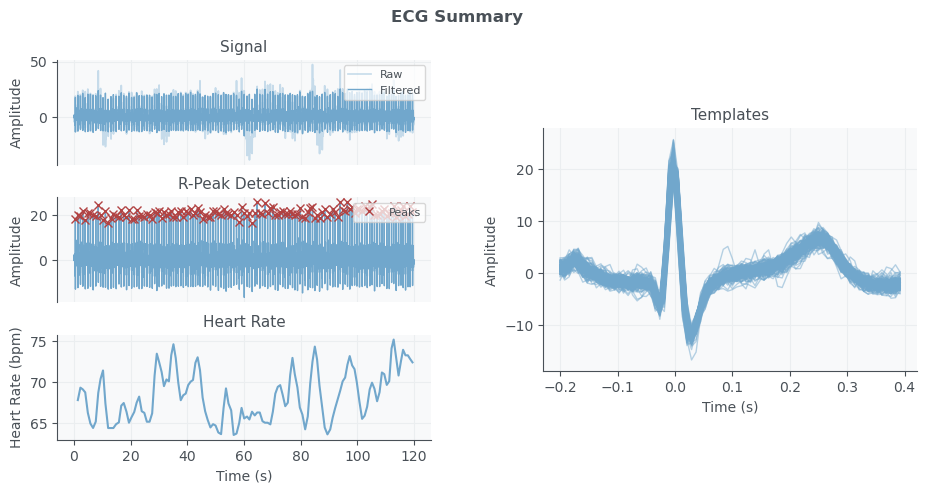

ReturnTuple(hr_mean=68.33578284737197, hr_min=59.07692307692308, hr_max=80.0, hr_std=4.337517826708085) ReturnTuple(sdnn=56.07098158188642) ReturnTuple(rmssd=65.66302425412464)


In [236]:
ts, filtered, rpeaks, templates_ts, templates, heart_rate_ts, heart_rate = biosppy.signals.ecg.ecg(all_event_series[100], show=True, sampling_rate=128)
rpeaks = rpeaks/128 * 1000
nni = tools.nn_intervals(rpeaks)
hr_params = td.hr_parameters(nni)
sdnn = td.sdnn(nni)
rmssd = td.rmssd(nni)
print(hr_params, sdnn, rmssd)


In [239]:
#results = pyhrv.hrv(nni)
#print(results)

In [237]:
non_drowsy = pd.read_csv("7319612/Exp1/Exp1/Preprocessed/Physio/windows/features_window_120s_overlap_0.csv")
col_name = ['subject_id', 'label_relaxation', 'label_passenger', 'period', 'segment_id', 'time_start', 'time_end']
for i in non_drowsy.columns.values:
    if ("ECG" in i) or ("HRV" in i) or ("HR" in i):
        col_name.append(i)
non_drowsy = non_drowsy.loc[:, non_drowsy.columns.isin(col_name)]
non_drowsy = non_drowsy.query('period == "Driving"')
print(non_drowsy)

     subject_id  label_relaxation  label_passenger   period  segment_id  \
4             1                 0                0  Driving           0   
5             1                 0                0  Driving           1   
6             1                 0                0  Driving           2   
7             1                 0                0  Driving           3   
12            2                 1                0  Driving           0   
..          ...               ...              ...      ...         ...   
489          60                 0                1  Driving           4   
495          61                 0                1  Driving           0   
496          61                 0                1  Driving           1   
497          61                 0                1  Driving           2   
498          61                 0                1  Driving           3   

     time_start  time_end  ECG_Rate_Mean_Bl  HRV_MeanNN_Bl  HRV_SDNN_Bl  ...  \
4             0    

In [240]:
non_drowsy = pd.read_csv("7319612/Exp2/Exp2/Preprocessed/Physio/windows/features_window_180s_overlap_0.csv")
col_name = ['subject_id', 'label_relaxation', 'label_passenger', 'period', 'segment_id', 'time_start', 'time_end']
for i in non_drowsy.columns.values:
    if ("ECG" in i) or ("HRV" in i) or ("HR" in i):
        col_name.append(i)
non_drowsy = non_drowsy.loc[:, non_drowsy.columns.isin(col_name)]
non_drowsy = non_drowsy.query('period == "Driving"')
print(non_drowsy)

     subject_id   period  segment_id  time_start  time_end  ECG_Rate_Mean_Bl  \
0             1  Driving           0           0       180         87.703360   
1             1  Driving           1         180       360         87.703360   
2             1  Driving           2         360       540         87.703360   
3             1  Driving           3         540       720         87.703360   
4             1  Driving           4         720       900         87.703360   
..          ...      ...         ...         ...       ...               ...   
517          90  Driving           1         180       360         73.490392   
518          90  Driving           2         360       540         73.490392   
519          90  Driving           3         540       720         73.490392   
520          90  Driving           4         720       900         73.490392   
521          90  Driving           5         900      1080         73.490392   

     HRV_MeanNN_Bl  HRV_SDNN_Bl  HRV_SD